### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Line Detection with Canny Algorithm**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

### Importing libraries

In [2]:
import cv2
import skimage
import numpy as np
from scipy import ndimage
from skimage import exposure
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med

/var/folders/dd/h6ysp6hd74s6ypbck34s5gym0000gn/T/ipykernel_3627/29601034.py:9: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve
/var/folders/dd/h6ysp6hd74s6ypbck34s5gym0000gn/T/ipykernel_3627/29601034.py:10: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
/var/folders/dd/h6ysp6hd74s6ypbck34s5gym0000gn/T/ipykernel_3627/29601034.py:11: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


### Loading Images

In [3]:
# Loading images
car = cv2.imread("data/cars.jpg")
car_image = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)

In [4]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if i < len(labels):
                ax.set_title(labels[i])
            # dont show the axis ticks
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()


### 1. Noise Reduction
Edge detection are highly sensitive to image noise due to the derivatives behind the algorithm.

We can apply a Gaussian Kernel, the size of the kernel depends on the expected blurring effect. The smaller the less blurring effect.

Equation for Gaussian Kernel of size $(2k+1) \times (2k+1)$

$$
H_{i, j} = \frac{1}{2\pi\sigma^2}exp(-\frac{(i-(k+1))^2 + (j-(k+1))^2}{2\sigma^2}); 1\leq i, j \leq (2k+1)
$$

### 1.1 Sigma Parameter $\sigma$

In [81]:
# Change this parameter
sigma_ = [1, 1.5, 5, 10, 20]

### 1.2 Kernel Size Parameter

In [82]:
kernel_size = (3,3)

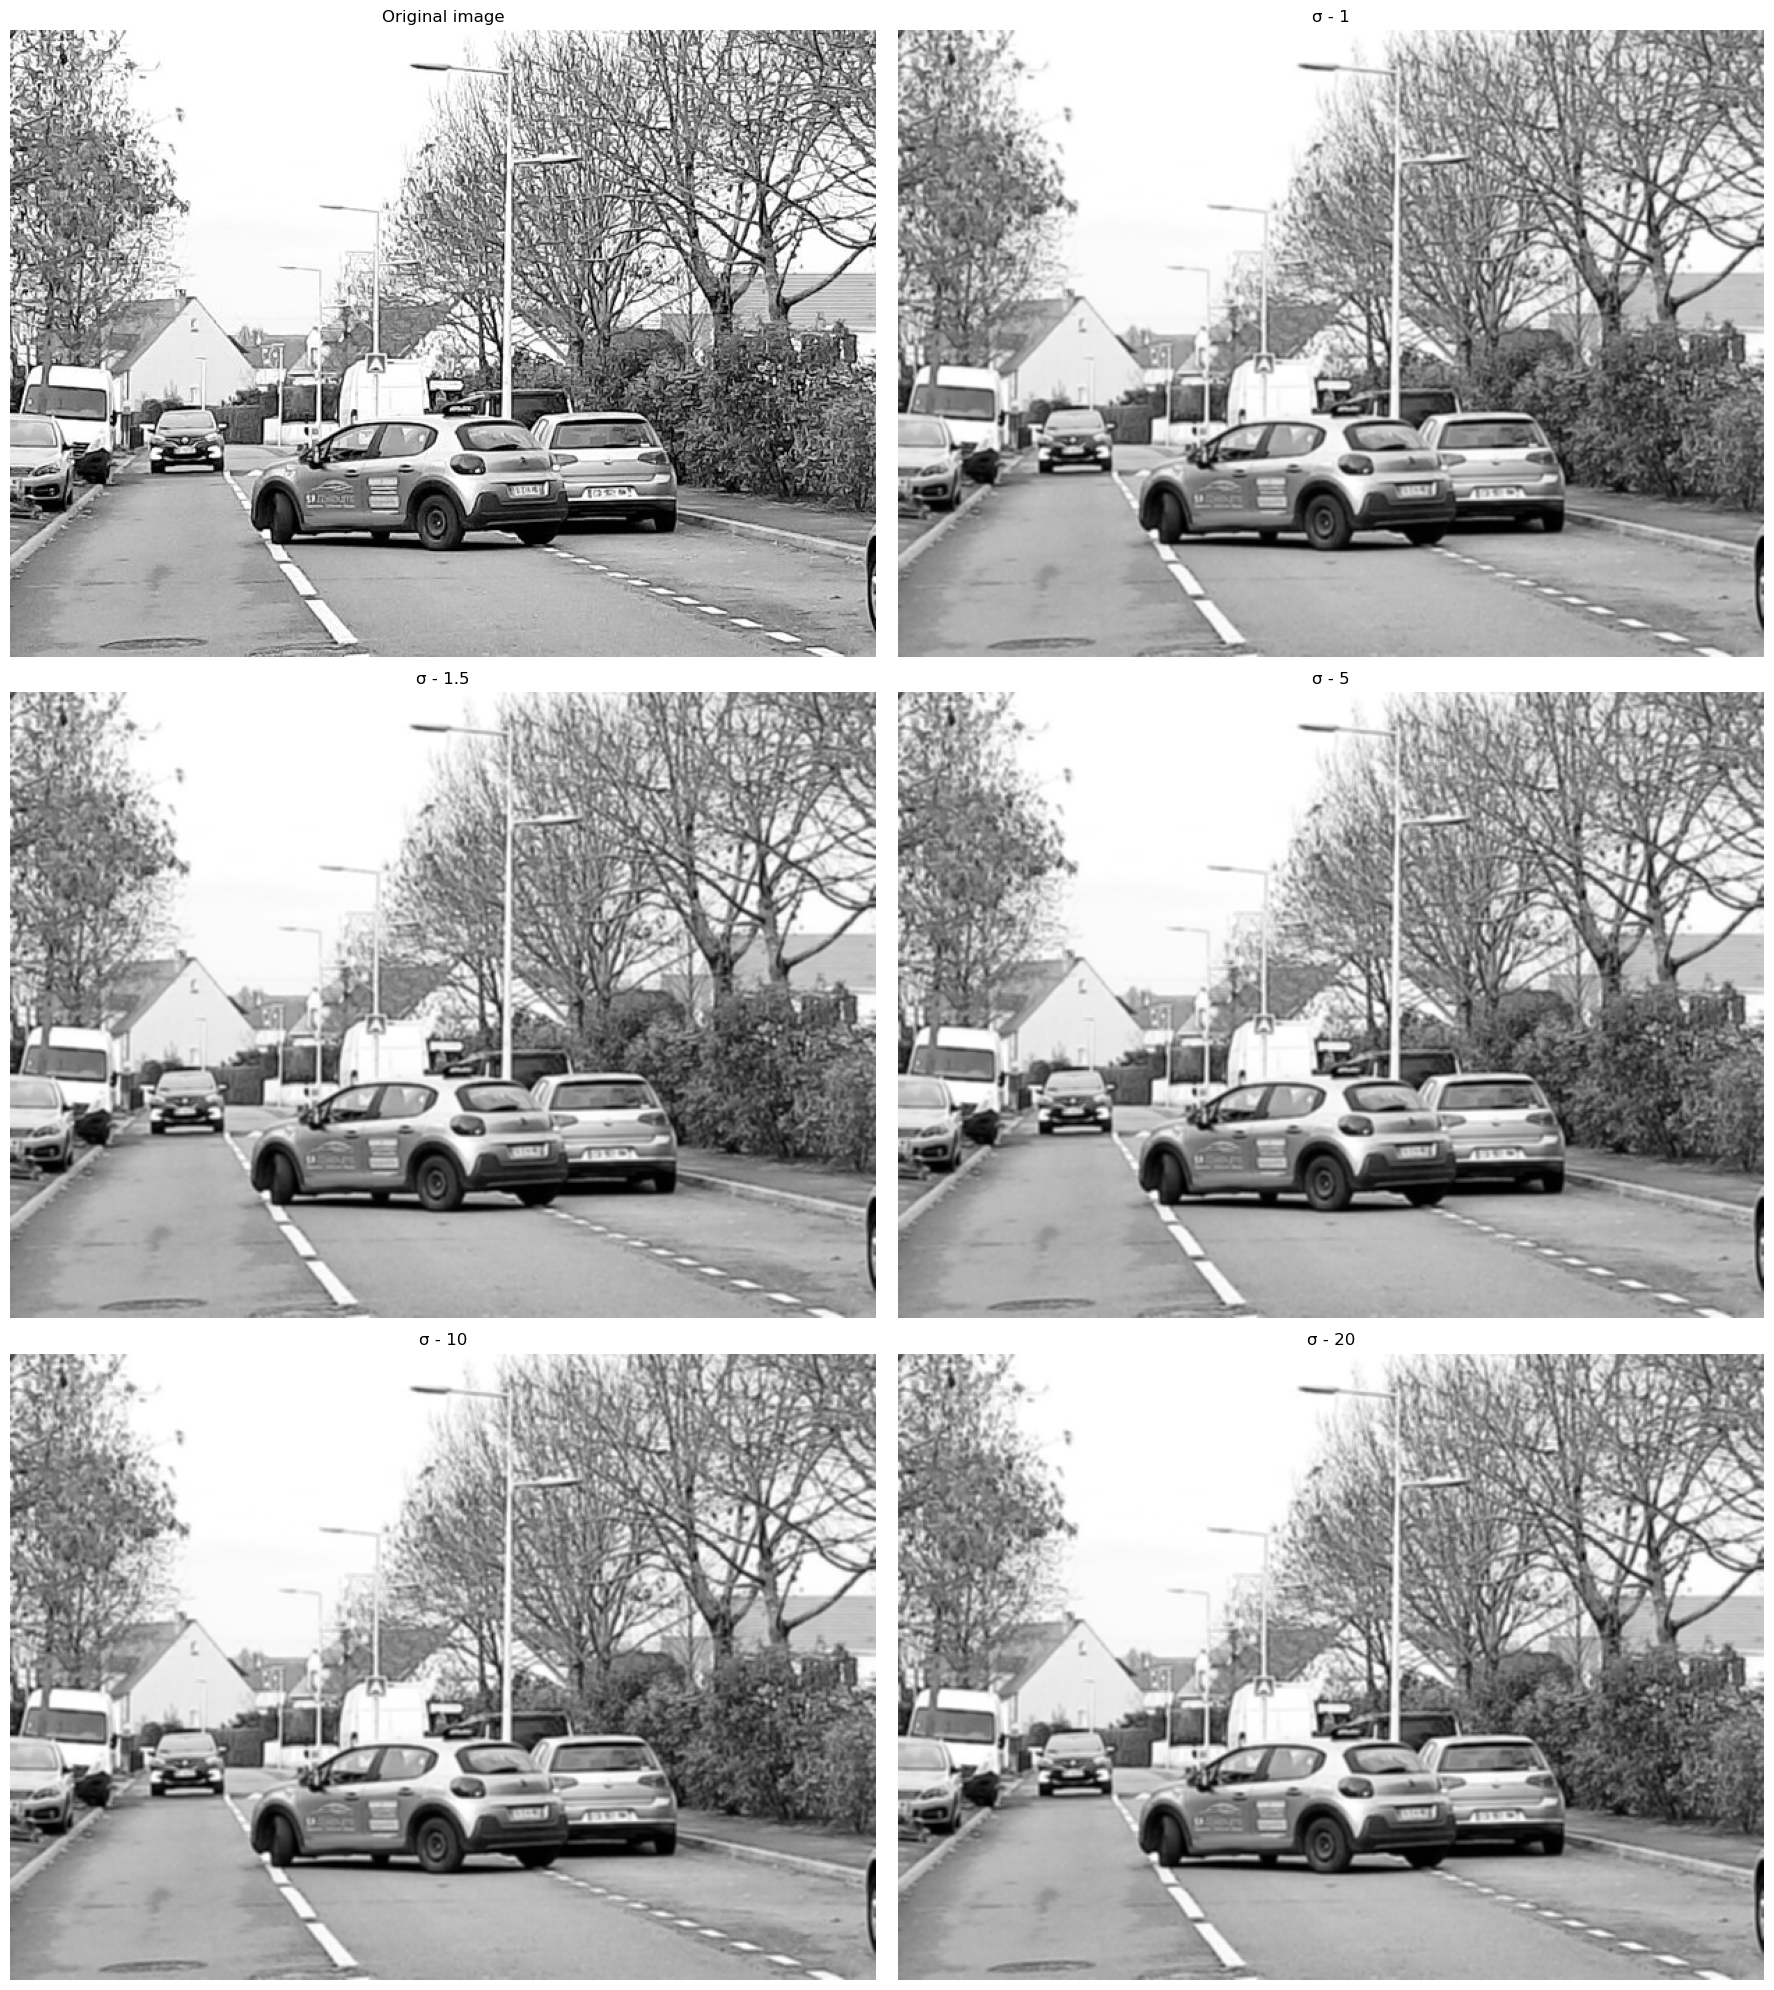

In [83]:
def noise_removal(image, kernel_size, sigma_, labels = []):
    # try different 
    transformed_images = [cv2.GaussianBlur(image, kernel_size, sigma) for sigma in sigma_]
    # set original image
    transformed_images[:0] = [image]
    
    if len(labels) < 1:
        sigma_symbol = "\u03C3"
        labels = [f"{sigma_symbol} - {str(sigma)}" for sigma in sigma_]
        labels[:0] =[ "Original image"]
    
    return transformed_images, labels

blured_images, labels = noise_removal(car_image.copy(), kernel_size, sigma_)

plot_images(blured_images, labels, nrows=3, ncols=2, figsize=(18,20))

### 2. Canny


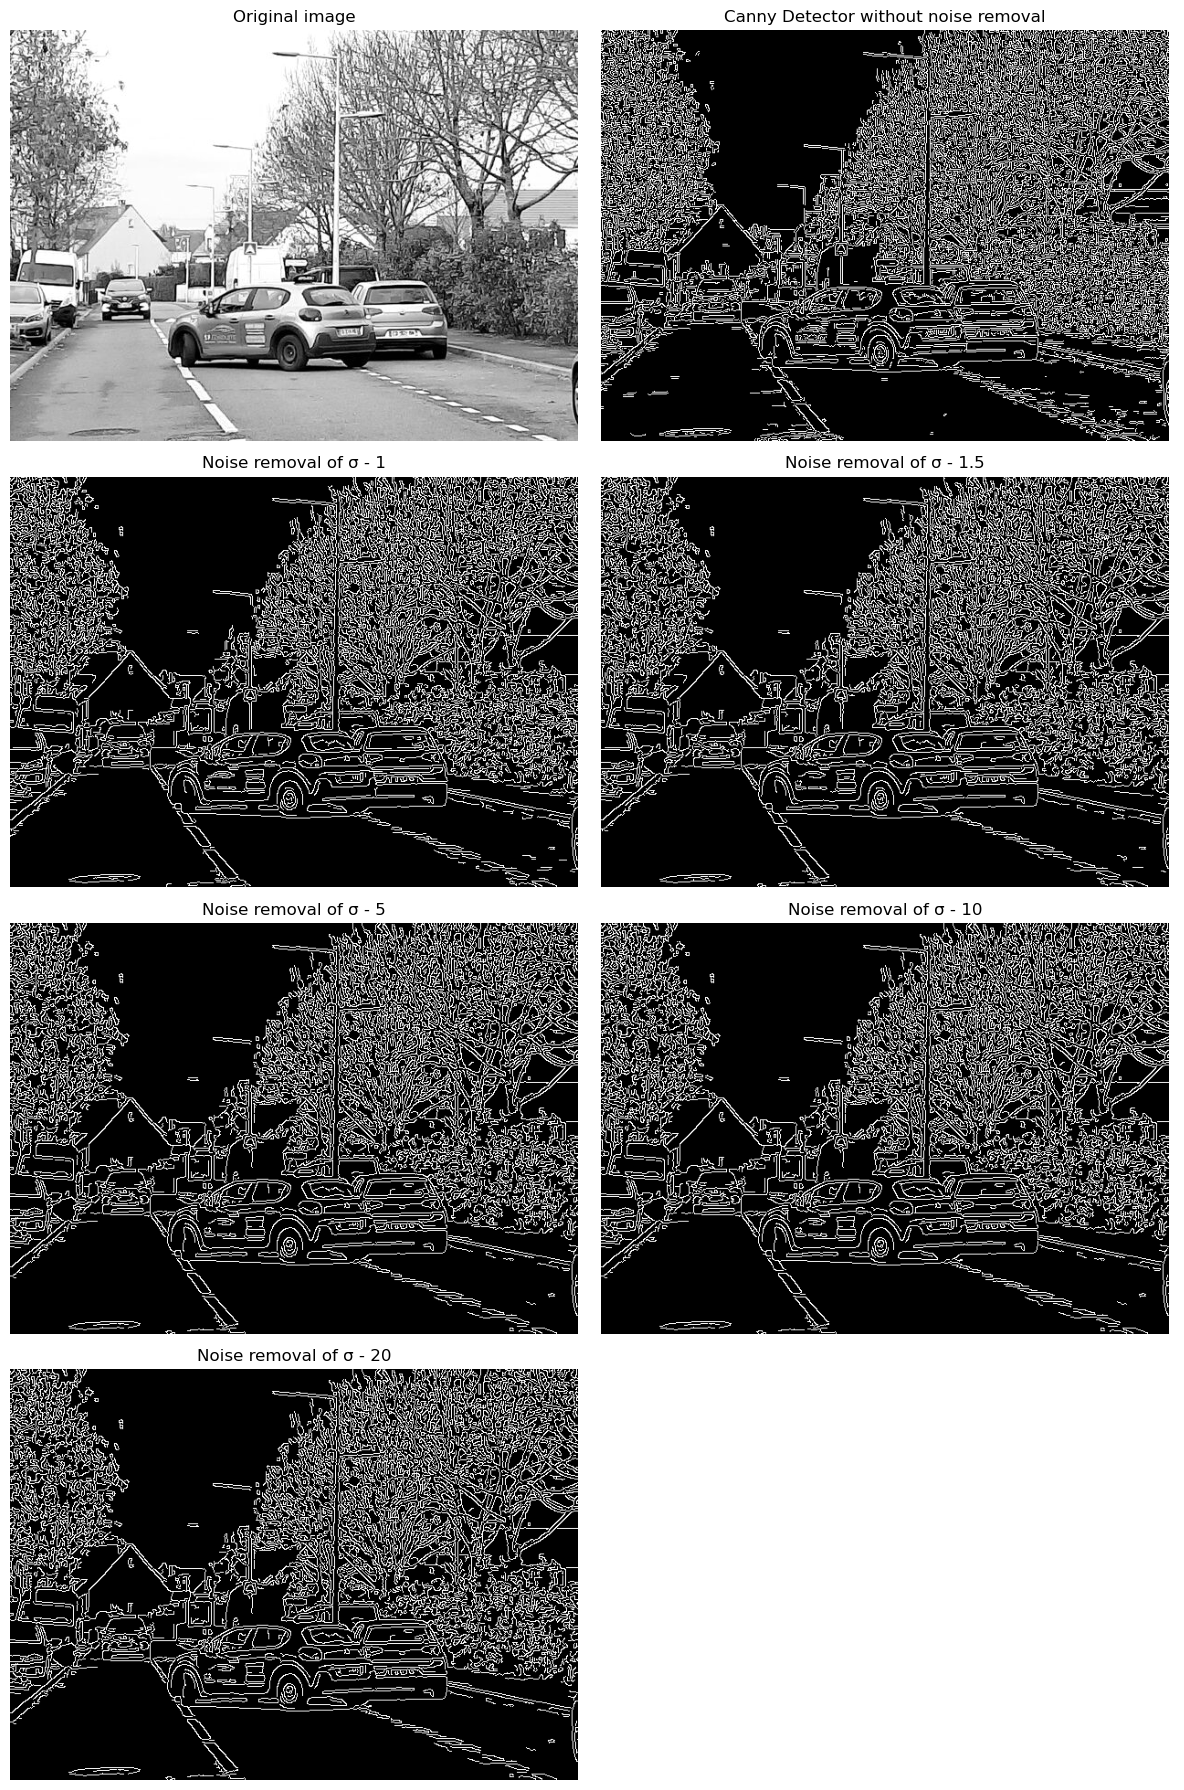

In [84]:
def canny(images, low_umbral=100, high_umbral=200):
    transformed_images = [cv2.Canny(image, low_umbral, high_umbral) for image in images]
    transformed_images[:0] = [car_image]
    return transformed_images

labels.insert(1,"Canny Detector without noise removal")
labels[2:] = [f"Noise removal of {label}" for label in labels[2:] ]
plot_images(canny(blured_images), labels, ncols=2, nrows=4, figsize=(12,18))

### Conclusion

### References
